#  **College Event Feedback Analysis**

## Internship Project – Data Science & Analytics (Future Interns)

### Project Overview
College events such as workshops, seminars, and academic sessions often collect
student feedback. However, this feedback is not always analyzed effectively.

In this project, student feedback data is analyzed to understand satisfaction levels,
identify strengths, and highlight areas for improvement. The analysis uses rating-based
responses and focuses on generating actionable insights that can help improve future
college events.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("student_feedback.csv")
df.sample(5)

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
971,971,531,9,8,7,6,3,8,3,7
218,218,128,6,2,6,1,9,3,9,2
91,91,297,7,10,6,8,10,10,2,8
168,168,616,9,8,6,9,6,3,5,8
84,84,171,6,10,4,6,1,6,2,3


## Dataset Description

The dataset contains student feedback collected after academic events such as
workshops or sessions. Feedback is provided using numerical ratings on a scale
(from low to high), representing students’ level of satisfaction across different
aspects of the event.

Each row represents feedback submitted by a student, and each column corresponds
to a specific aspect such as content clarity, organization, engagement, and
recommendation likelihood.


In [3]:
# Dataset shape
df.shape

(1001, 10)

In [4]:
# Column names
df.columns

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [5]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [6]:
df.describe()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Initial Observations

The dataset contains feedback from 1001 students. The highest average rating is
observed for subject knowledge, indicating that event content quality is strong.

However, aspects such as presentation usage, engagement, and clarity of explanation
received moderate ratings, suggesting opportunities for improvement in delivery
and interaction. The recommendation score indicates an overall average satisfaction
level among students.


## Data Preprocessing

Before performing analysis, the dataset needs to be cleaned and prepared.
This step ensures the data is consistent, usable, and suitable for analysis.

The preprocessing steps include:
- Removing unnecessary columns
- Checking for missing values
- Ensuring correct data types
- Understanding the range of rating values


In [7]:
# Drop unnecessary index column
df.drop("Unnamed: 0",axis = 1,inplace = True)
df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [8]:
# Missing Value
df.isnull().sum()

Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

In [9]:
# Check data types
df.dtypes

Student ID                                              int64
Well versed with the subject                            int64
Explains concepts in an understandable way              int64
Use of presentations                                    int64
Degree of difficulty of assignments                     int64
Solves doubts willingly                                 int64
Structuring of the course                               int64
Provides support for students going above and beyond    int64
Course recommendation based on relevance                int64
dtype: object

### Column Renaming for Event Context

To align the dataset with the college event feedback analysis task, the column
names are renamed to reflect event-level attributes such as session quality,
delivery, engagement, and recommendation likelihood.

This step improves clarity and makes the analysis easier to interpret

In [11]:
# Rename columns to align with event feedback context
df.rename(columns={
    'Student ID': 'Participant_ID',
    'Well versed with the subject': 'Speaker_Knowledge',
    'Explains concepts in an understandable way': 'Clarity_of_Explanation',
    'Use of presentations': 'Quality_of_Presentations',
    'Degree of difficulty of assignments': 'Activity_Difficulty',
    'Solves doubts willingly': 'Doubt_Resolution',
    'Structuring of the course': 'Event_Structure',
    'Provides support for students going above and beyond': 'Additional_Support',
    'Course recommendation based on relevance': 'Recommendation_Score'
}, inplace=True)

df.head()

,Participant_ID,Speaker_Knowledge,Clarity_of_Explanation,Quality_of_Presentations,Activity_Difficulty,Doubt_Resolution,Event_Structure,Additional_Support,Recommendation_Score
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


After renaming, the dataset clearly represents feedback collected from participants
about different aspects of a college event, making it suitable for further analysis
and insight generation.

After preprocessing, the dataset is clean and ready for analysis.
All feedback responses are numeric and fall within a consistent rating range.
This allows meaningful comparison across different aspects of the event.


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is performed to understand patterns, trends, and
relationships within the feedback data. The goal is to identify strengths,
weaknesses, and areas where future college events can be improved based on
student feedback.





### Average Feedback Score by Event Aspect

In this analysis, we calculate the average score for each feedback question
to understand which aspects of the event performed well and which areas
require improvement.


In [12]:
# Seperate rating columns from 	Participant_ID
rating_columns = df.columns.drop('Participant_ID')
rating_columns

Index(['Speaker_Knowledge', 'Clarity_of_Explanation',
       'Quality_of_Presentations', 'Activity_Difficulty', 'Doubt_Resolution',
       'Event_Structure', 'Additional_Support', 'Recommendation_Score'],
      dtype='object')

In [15]:
# Calculate the average score for each column
avg_score = df[rating_columns].mean()

#Convert series to Data Frame
avg_scores_df = avg_score.reset_index()

avg_scores_df

,index,0
0,Speaker_Knowledge,7.497502
1,Clarity_of_Explanation,6.081918
2,Quality_of_Presentations,5.942058
3,Activity_Difficulty,5.430569
4,Doubt_Resolution,5.474525
5,Event_Structure,5.636364
6,Additional_Support,5.662338
7,Recommendation_Score,5.598402


In [16]:
# Rename the columns for better understanding
avg_scores_df.columns = ['Aspects','Average_Score']
avg_scores_df

,Aspects,Average_Score
0,Speaker_Knowledge,7.497502
1,Clarity_of_Explanation,6.081918
2,Quality_of_Presentations,5.942058
3,Activity_Difficulty,5.430569
4,Doubt_Resolution,5.474525
5,Event_Structure,5.636364
6,Additional_Support,5.662338
7,Recommendation_Score,5.598402


In [17]:
avg_scores_df =  avg_scores_df.sort_values('Average_Score',ascending = False)
avg_scores_df

,Aspects,Average_Score
0,Speaker_Knowledge,7.497502
1,Clarity_of_Explanation,6.081918
2,Quality_of_Presentations,5.942058
6,Additional_Support,5.662338
5,Event_Structure,5.636364
7,Recommendation_Score,5.598402
4,Doubt_Resolution,5.474525
3,Activity_Difficulty,5.430569


Text(0.5, 1.0, 'Average Feedback Score by Event Aspect')

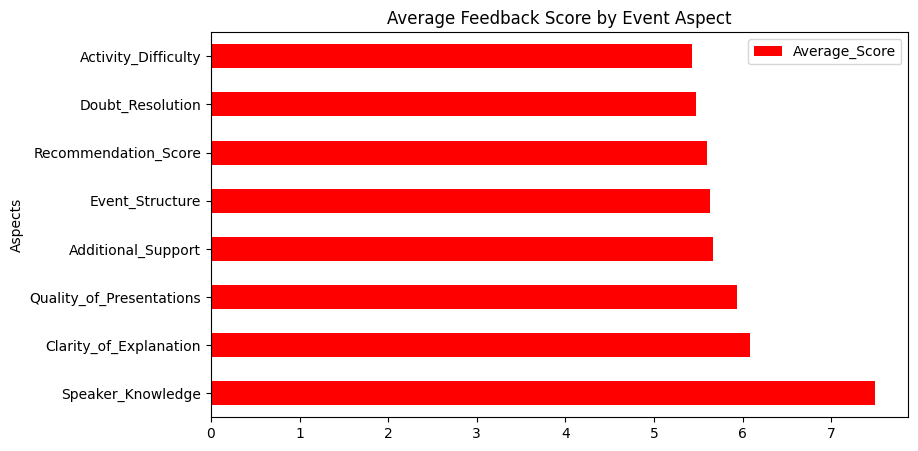

In [25]:
# Plot the average scores
avg_scores_df.plot(x = 'Aspects',y = 'Average_Score',kind = 'barh',figsize = (9,5),color = 'red')
plt.title('Average Feedback Score by Event Aspect')

### Notes
The highest average score is observed for Speaker Knowlegde for subject, indicating that event content quality is a strong point.


Lower scores for Activity Difficulty, Doubt Resolution and Recommendation Score suggest areas where improvements can enhance the overall event experience.

### Distribution of Ratings

This section analyzes how student ratings are distributed for key aspects
to understand consistency and variation in feedback.


In [36]:
# Select a key feedback aspect
aspect1 = "Speaker_Knowledge"
df[aspect1].describe()

count    1001.000000
mean        7.497502
std         1.692998
min         5.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: Speaker_Knowledge, dtype: float64

Text(0.5, 1.0, 'Distribution of Ratings : Speaker Knowledge')

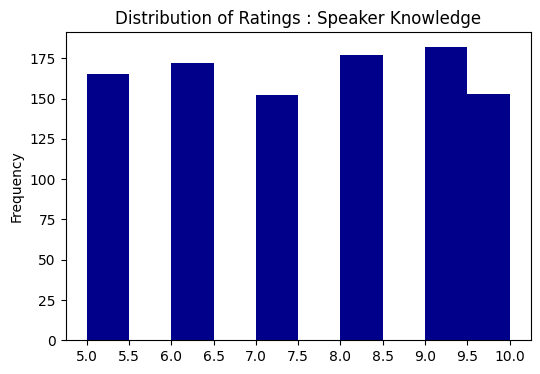

In [37]:
# Plot histogram for rating distribution 

# np.histogram returns 2 values
count, bin_edges =np.histogram(df[aspect1])

df[aspect].plot(kind = 'hist',bins = 10,figsize = (6,4),xticks=bin_edges,color = 'darkblue')
plt.title("Distribution of Ratings : Speaker Knowledge")

### Notes
Most ratings for subject knowledge fall in the higher range, indicating
consistent satisfaction across participants with relatively few low scores.


Text(0.5, 1.0, 'Distribution of Ratings : Doubt Resolution')

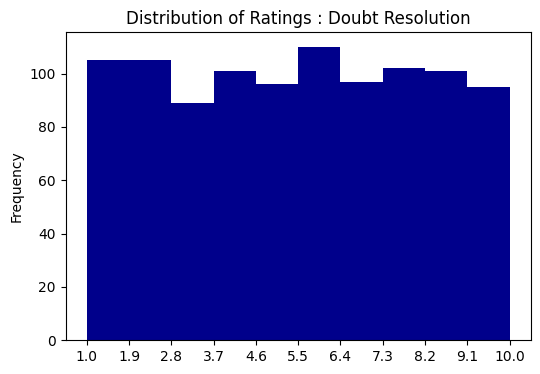

In [46]:
# Repeat same for Doubt_Resolution aspect
# Select a key feedback aspect
aspect2 = "Doubt_Resolution"

# Plot histogram for rating distribution 

# np.histogram returns 2 values
count, bin_edges =np.histogram(df[aspect2])

df[aspect2].plot(kind = 'hist',bins = 10,figsize = (6,4),xticks=bin_edges,color = 'darkblue')
plt.title("Distribution of Ratings : Doubt Resolution")

### Notes

- The ratings for Doubt Resolution are distributed across a wide range, from low to high values, indicating inconsistent experiences among participants.
- The lower average score suggests that while some students received adequate support, a significant portion felt their doubts were not addressed effectively.
- High variability in ratings highlights a lack of uniform engagement during events, possibly due to time constraints or limited interaction opportunities.
- Improving structured Q&A sessions or allocating dedicated time for doubt resolution could help improve participant satisfaction in this area.


Text(0.5, 1.0, 'Distribution of Ratings : Event Structure')

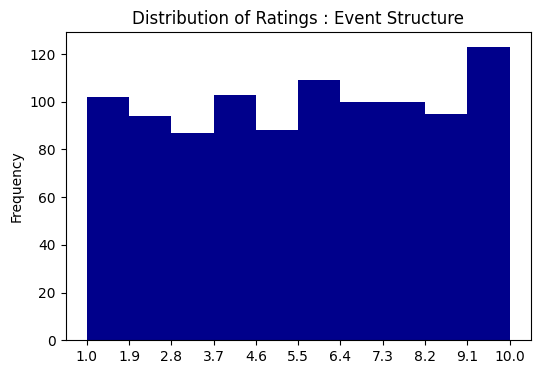

In [81]:
# Repeat same for Event_Structure aspect
# Select a key feedback aspect
aspect3 = "Event_Structure"

# Plot histogram for rating distribution 

# np.histogram returns 2 values
count, bin_edges =np.histogram(df[aspect3])

df[aspect3].plot(kind = 'hist',bins = 10,figsize = (6,4),xticks=bin_edges,color = 'darkblue')
plt.title("Distribution of Ratings : Event Structure")

### Notes

- Event Structure ratings are evenly distributed, indicating a balanced but average perception among participants.
- Refinements in event planning and flow could help improve overall satisfaction.


## Relationship Between Feedback Aspects

Correlation analysis helps identify how different aspects of the event
experience are related to each other.


In [48]:
# Correlation Matrix
correlation_matrix = df[rating_columns].corr()
correlation_matrix

,Speaker_Knowledge,Clarity_of_Explanation,Quality_of_Presentations,Activity_Difficulty,Doubt_Resolution,Event_Structure,Additional_Support,Recommendation_Score
Speaker_Knowledge,1.000000,0.008916,-0.024674,-0.007087,-0.056981,-0.027490,0.031488,-0.015143
Clarity_of_Explanation,0.008916,1.000000,-0.012305,0.029484,-0.025839,0.012766,-0.003237,0.008528
Quality_of_Presentations,-0.024674,-0.012305,1.000000,0.020918,-0.036972,-0.020097,-0.014798,0.023173
Activity_Difficulty,-0.007087,0.029484,0.020918,1.000000,0.009637,-0.053624,-0.002949,-0.005181
Doubt_Resolution,-0.056981,-0.025839,-0.036972,0.009637,1.000000,0.036062,0.006543,-0.000511
Event_Structure,-0.027490,0.012766,-0.020097,-0.053624,0.036062,1.000000,-0.027819,-0.010224
Additional_Support,0.031488,-0.003237,-0.014798,-0.002949,0.006543,-0.027819,1.000000,-0.031117
Recommendation_Score,-0.015143,0.008528,0.023173,-0.005181,-0.000511,-0.010224,-0.031117,1.000000


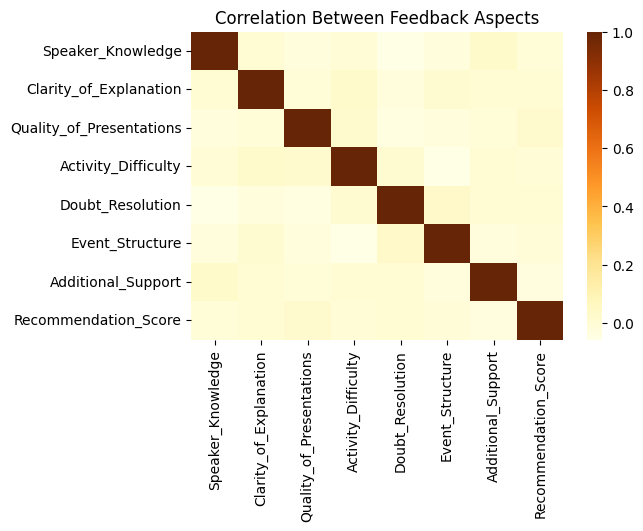

In [55]:
plt.figure(figsize =(6,4))
# creating a colormap
colormap = sns.color_palette("Greens")
sns.heatmap(correlation_matrix, cmap="YlOrBr")
plt.title('Correlation Between Feedback Aspects')
plt.show()

### Notes : Correlation Analysis

The correlation matrix shows that most feedback aspects have very weak
relationships with each other, as indicated by correlation values close to zero.
This suggests that student perceptions of different event aspects are largely
independent.

Improvements in one area, such as presentation quality or doubt resolution, may
not directly influence other aspects like recommendation score or event structure.
Therefore, each feedback dimension should be addressed individually to improve
overall event satisfaction.


## Distribution Analysis of Key Event Aspects

To understand how ratings are distributed, a distribution analysis was performed
for three representative aspects:
- Highest rated aspect
- Moderately rated aspect
- Lowest rated aspect

This approach helps compare participant perception across strong, average, and
weak areas without overcrowding the visualization.


In [84]:
# Select representative aspects
selected_aspects = [
    'Speaker_Knowledge',
    'Quality_of_Presentations',
    'Activity_Difficulty'
]
# Create an empty DataFrame
rating_counts = pd.DataFrame()
# Count ratings for each selected aspect
for aspect in selected_aspects:
    rating_counts[aspect] = df[aspect].value_counts().sort_index()
# Replace missing values with 0
rating_counts = rating_counts.fillna(0)
# Name the index properly
rating_counts.index.name = 'Rating'
rating_counts

,Speaker_Knowledge,Quality_of_Presentations,Activity_Difficulty
Rating,,,
5,165,196.0,97
6,172,196.0,112
7,152,208.0,85
8,177,183.0,95
9,182,0.0,107
10,153,0.0,93


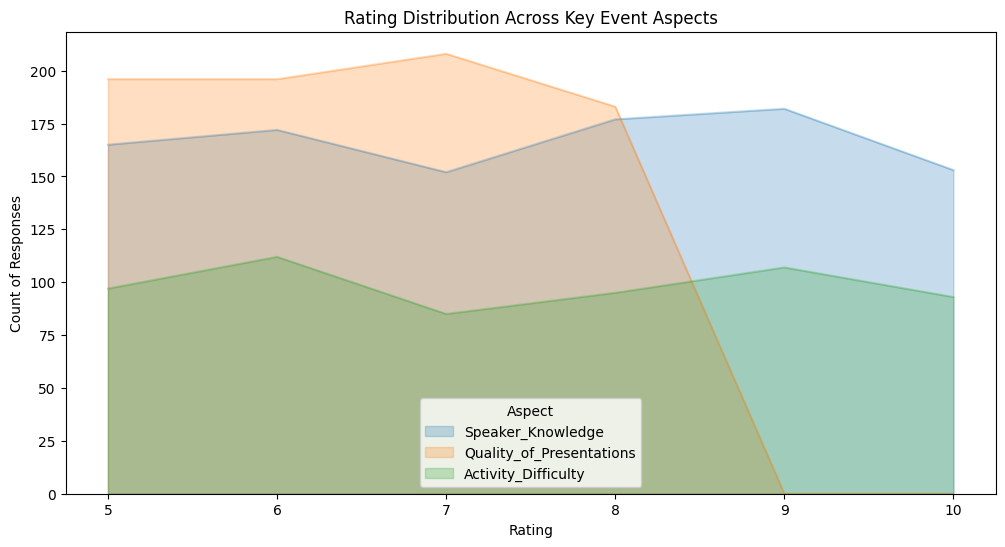

In [85]:
rating_counts.plot(
    kind='area',
    figsize=(12,6),
    alpha=0.25,
    stacked=False
)

plt.title('Rating Distribution Across Key Event Aspects')
plt.xlabel('Rating')
plt.ylabel('Count of Responses')
plt.legend(title='Aspect')
plt.show()


### Notes : Insight from Area Chart Analysis

The distribution of ratings for Speaker Knowledge shows a relatively even spread
between ratings 5 and 10, with a consistently high number of responses. This
indicates that participants generally perceive speaker expertise positively and
with minimal variation.

Activity Difficulty displays a similar spread across ratings 5 to 10 but with
lower response counts. This suggests mixed opinions regarding the difficulty
level, indicating that the activities may not be uniformly aligned with
participant expectations.

In contrast, Quality of Presentations shows the highest concentration of
responses between ratings 5 and 8, indicating strong engagement. However, the
sharp decline beyond rating 8 and the absence of top-end ratings suggest that
while presentations were effective, they did not consistently achieve an
excellent standard.


## Sentiment Analysis Approach

In this section, we perform a sentiment analysis to understand the overall
emotional tone of student feedback. Since the dataset does not contain textual
comments, sentiment is inferred from numerical ratings.

The Overall Satisfaction score is used as a proxy for sentiment, where higher
scores indicate positive sentiment, mid-range scores indicate neutral sentiment,
and lower scores indicate negative sentiment. This approach allows us to summarize
participant sentiment in a meaningful and data-driven manner using the available
information.


In [ ]:
# Define sentiment based on rating values
def sentiment_label(score):
    if score >= 7:
        return 'Positive'
    elif score >= 5:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment categorization on overall satisfaction
df['Sentiment'] = df['Overall_Satisfaction'].apply(sentiment_label)

df['Sentiment'].value_counts()


In [86]:
# Define sentiment based on rating values
def sentiment_label(score):
    if score >= 7:
        return 'Positive'
    elif score >= 5:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment categorization on overall satisfaction
df['Sentiment'] = df['Overall_Satisfaction'].apply(sentiment_label)

df['Sentiment'].value_counts()


Sentiment
Neutral     732
Negative    138
Positive    131
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Distribution Based on Ratings'}, xlabel='Sentiment'>

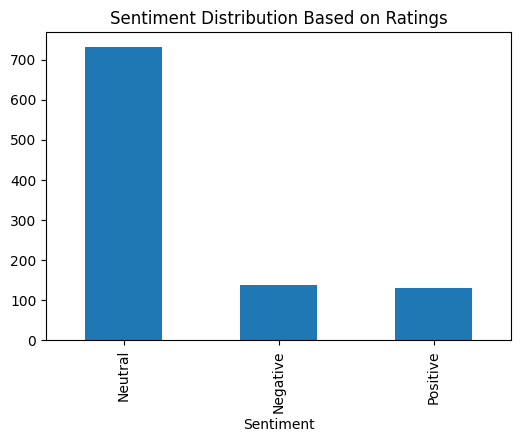

In [87]:
df['Sentiment'].value_counts().plot(
    kind='bar',
    figsize=(6,4),
    title='Sentiment Distribution Based on Ratings'
)


### Notes : Sentiment Analysis Summary

The sentiment distribution indicates that the majority of feedback falls under
the neutral category, accounting for most participant responses. This suggests
that while the events generally met expectations, they did not consistently
create highly positive experiences.

Positive sentiment is observed in a smaller proportion of responses, reflecting
instances where participants were highly satisfied with the event. Negative
sentiment, though less frequent, highlights areas where participants were
dissatisfied and signals opportunities for targeted improvement.

Overall, the sentiment analysis suggests that enhancing engagement, interaction,
and delivery quality could help shift neutral and negative perceptions toward a
more positive participant experience.


## Overall Satisfaction Analysis

An overall satisfaction score is calculated by averaging all feedback
aspects for each student to understand general satisfaction levels.


In [56]:
# Calculate overall satisfaction score
df['Overall_Satisfaction'] = df[rating_columns].mean(axis = 1)

df['Overall_Satisfaction'].describe()

count    1001.000000
mean        5.915460
std         0.894734
min         3.375000
25%         5.250000
50%         5.875000
75%         6.625000
max         8.250000
Name: Overall_Satisfaction, dtype: float64

Text(0.5, 1.0, 'Overall Student Satisfaction Distribution')

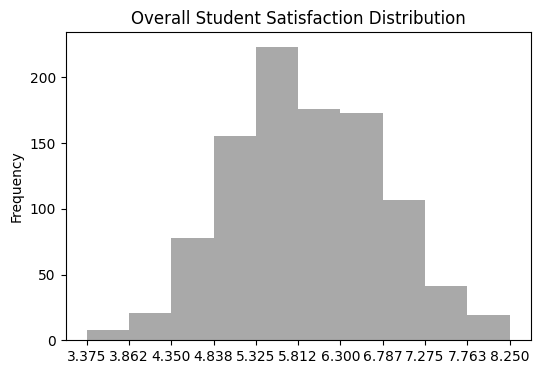

In [59]:
# np.histogram returns 2 values
count, bin_edges =np.histogram(df['Overall_Satisfaction'])

df['Overall_Satisfaction'].plot(kind = 'hist',bins = 10,figsize = (6,4),xticks=bin_edges,color = 'darkgrey')
plt.title("Overall Student Satisfaction Distribution")

### Notes: Overall Student Satisfaction

To understand general student satisfaction, an Overall Satisfaction score was
calculated for each response. This score represents the average of all feedback
ratings provided by a student across different event aspects.

By combining individual ratings into a single metric, it becomes easier to
analyze overall perception and identify general satisfaction trends.

#### Interpretation

The average Overall Satisfaction score is approximately 5.9, indicating a
moderate level of satisfaction among participants. The distribution shows that
most students rated their experience between 5.25 and 6.62, suggesting generally
positive but not exceptional feedback.

The absence of very high overall scores highlights opportunities to improve the
event experience, particularly in areas related to engagement, support, and
delivery.

Overall satisfaction is moderate, indicating that while events meet expectations,
there is clear room for improvement to achieve higher participant satisfaction.



## Conclusion

### Overall Student Satisfaction
- The Overall Satisfaction score reflects a moderate level of satisfaction among participants.
- Most students had a generally positive experience, but the results indicate room for improvement to achieve higher satisfaction levels.

### Strong Performing Aspects
- Speaker Knowledge is the highest-rated aspect, showing consistent and strong subject expertise across events.
- High and evenly distributed ratings indicate reliability in content quality.

### Areas Requiring Improvement
- Activity Difficulty received lower and more variable ratings, suggesting mixed participant experiences.
- Doubt Resolution shows inconsistent feedback, highlighting the need for better interaction and structured Q&A sessions.
- Quality of Presentations demonstrates good engagement but lacks top-end ratings, indicating opportunities to improve visual and delivery quality.

### Relationship Between Feedback Aspects
- Correlation analysis reveals weak relationships between different feedback aspects.
- Each aspect contributes independently to student satisfaction, emphasizing the need for targeted improvements.
  
### Sentiment Overview
- Sentiment analysis based on overall satisfaction scores shows that the majority of feedback is neutral.
- A smaller proportion of positive sentiment indicates that while events meet expectations, they do not consistently exceed them.
- The presence of negative sentiment highlights specific areas where targeted improvements are necessary.

### Future Suggestions and Improvements

- **Enhance Presentation Quality**
  - Improve slide design, visual clarity, and content flow to move participant
    feedback from “good” to “excellent”.
  - Standard presentation guidelines can help ensure consistency across events.


- **Strengthen Doubt Resolution Mechanisms**
  - Introduce dedicated Q&A sessions or structured discussion slots during events.
  - Encourage speakers to actively engage with participants to reduce variability
    in doubt-resolution experiences.


- **Optimize Activity Difficulty**
  - Re-evaluate the difficulty level of activities to better align with diverse
    participant skill levels.
  - Providing optional advanced or beginner-friendly tasks can improve overall
    satisfaction.
- **Improve Participant Support**
  - Increase support for students going beyond basic requirements by offering
    additional resources or follow-up sessions.
  - This can enhance perceived value and long-term engagement.
    

- **Focus on Holistic Event Experience**
  - Since feedback aspects operate independently, improvements should be made
    across multiple dimensions rather than relying on a single strength.
  - A balanced focus on content, delivery, interaction, and structure can lead to
    higher recommendation scores.


- **Use Feedback for Continuous Improvement**
  - Regular analysis of feedback data after each event can help track progress
    over time.
  - Comparing feedback across multiple events can support data-driven planning
    and better decision-making.

Overall, the analysis provides actionable insights that can help improve the
quality and effectiveness of future college events.

